In [ ]:
%load_ext autoreload
%autoreload 2

# Trend and Spatial Analysis of Congenital Malformations in Brazil (2015-2024)
## A Demonstration Notebook for a Scientific Paper

This notebook demonstrates the use of the `api` package to perform a complete analysis of the rates of congenital malformations in Brazil, covering the period from 2015 to 2024. The analysis includes:

1.  **Temporal Trend Analysis (2015-2024):**
    *   Calculation of prevalence rates for all anomalies (ICD-10, Chapter XVII - "Q") by Region.
    *   Application of trend tests (Linear Regression and Mann-Kendall).
    *   Visualization of time series.
2.  **Spatial Analysis (2015, 2020, and 2024):**
    *   Calculation of prevalence rates by municipality for the years 2015, 2020, and 2024.
    *   Spatial autocorrelation analysis (Global Moran's I and LISA) for each of these years.
    *   Visualization of spatial cluster maps.

### 1. Data Loading and Preparation

In [1]:
import pandas as pd
from api.sinasc import obter_taxa_sinasc

In [2]:

years = list(range(2015, 2025))
cid_prefix = 'Q'

print(f"Analyzing the period from {years[0]} to {years[-1]} for CID '{cid_prefix}'...")

regional_rates = obter_taxa_sinasc(
    anos=years,
    cid=cid_prefix,
    estratos=['REGIAO'],
    retorno='polars'
)

print("Prevalence rates per 100,000 live births (by Region and Year):")
display(regional_rates.head())

Analyzing the period from 2015 to 2024 for CID 'Q'...
Starting SINASC loading...
✅ Parquet 2015 already exists - using it directly
✅ Parquet 2016 already exists - using it directly
✅ Parquet 2017 already exists - using it directly
✅ Parquet 2018 already exists - using it directly
✅ Parquet 2019 already exists - using it directly
✅ Parquet 2020 already exists - using it directly
✅ Parquet 2021 already exists - using it directly
✅ Parquet 2022 already exists - using it directly
✅ Parquet 2023 already exists - using it directly
✅ Parquet 2024 already exists - using it directly
SINASC loading complete.
Prevalence rates per 100,000 live births (by Region and Year):


ano,REGIAO,n_nascidos_vivos,casos,taxa_por_100000
i32,str,u32,i64,f64
2015,"""Centro-Oeste""",247609,1573,635.275778
2015,"""Nordeste""",846374,7215,852.460024
2015,"""Norte""",320924,1712,533.459635
2015,"""Sudeste""",1196232,10633,888.874399
2015,"""Sul""",406529,3213,790.34952


### 2. Temporal Trend Analysis by Region

In [3]:
from api.analysis.trends import calcular_regressao_linear, calcular_mann_kendall

time_series_table = regional_rates.pivot(
    index="REGIAO",
    columns="ano",
    values="taxa_por_100000"
).to_pandas().set_index("REGIAO")

print("Time Series Table (rates per 100k):")
print(time_series_table)

regression_results = calcular_regressao_linear(time_series_table)
mk_results = calcular_mann_kendall(time_series_table)

print("Linear Regression Results by Region:")
display(regression_results)

print("Mann-Kendall Test Results by Region:")
display(mk_results)

Time Series Table (rates per 100k):
                    2015         2016         2017         2018        2019  \
REGIAO                                                                        
Centro-Oeste  635.275778   678.684867   643.982532   709.375546  719.675130   
Nordeste      852.460024   925.364173   785.257998   785.086933  822.948682   
Norte         533.459635   589.868824   579.502498   638.728432  695.259104   
Sudeste       888.874399  1069.357933  1047.548601  1062.330973  998.280140   
Sul           790.349520   788.432579   820.414282   817.719530  821.296203   

                     2020        2021         2022         2023         2024  
REGIAO                                                                        
Centro-Oeste   703.767019  731.409109   749.352508   776.887057   897.073368  
Nordeste       803.827230  821.591648   887.619451   959.417043  1078.514992  
Norte          637.525486  614.167222   736.275669   867.356095   978.281326  
Sudeste       1

/tmp/ipykernel_10864/1680596643.py:3: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  time_series_table = regional_rates.pivot(


,Grupo,Valor Inicial,Valor Final,Intercepto,Inclinacao,Inclinacao IC inferior,Inclinacao IC superior,R^2,p-valor,Variacao(%)
0,Centro-Oeste,635.275778,897.073368,-43589.843228,21.943249,12.66,31.22,0.79,0.00061,41.21
1,Nordeste,852.460024,1078.514992,-34316.841357,17.424635,-3.32,38.16,0.32,0.08870,26.52
2,Norte,533.459635,978.281326,-80071.596413,39.989423,21.47,58.51,0.76,0.00108,83.38
3,Sudeste,888.874399,1331.099722,-54487.167219,27.506425,4.36,50.65,0.48,0.02542,49.75
4,Sul,790.349520,1091.442450,-44741.042206,22.577167,6.54,38.62,0.57,0.01177,38.10


Mann-Kendall Test Results by Region:


,Tendencia,h,p-valor,z,Tau,Score,Variancia,Inclinacao,Intercepto,Valor Inicial,Valor Final
REGIAO,,,,,,,,,,,
Centro-Oeste,increasing,True,0.000677,3.398823,0.866667,39.0,125.0,19.928162,624.848607,635.275778,897.073368
Nordeste,no trend,False,0.152406,1.431084,0.377778,17.0,125.0,18.845342,752.900315,852.460024,1078.514992
Norte,increasing,True,0.004208,2.862167,0.733333,33.0,125.0,40.449867,456.102557,533.459635,978.281326
Sudeste,no trend,False,0.283131,1.073313,0.288889,13.0,125.0,22.080615,946.673370,888.874399,1331.099722
Sul,increasing,True,0.004208,2.862167,0.733333,33.0,125.0,12.983112,762.431239,790.349520,1091.442450


### 3. Temporal Trend Visualization

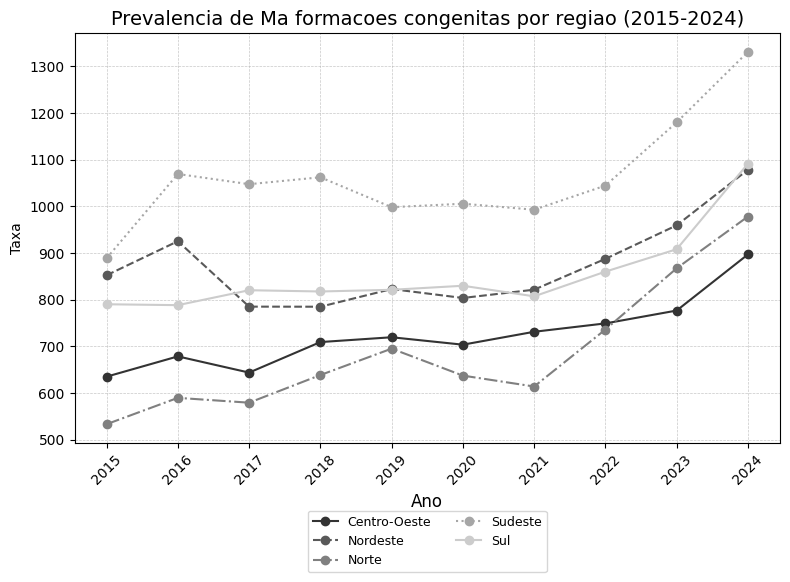

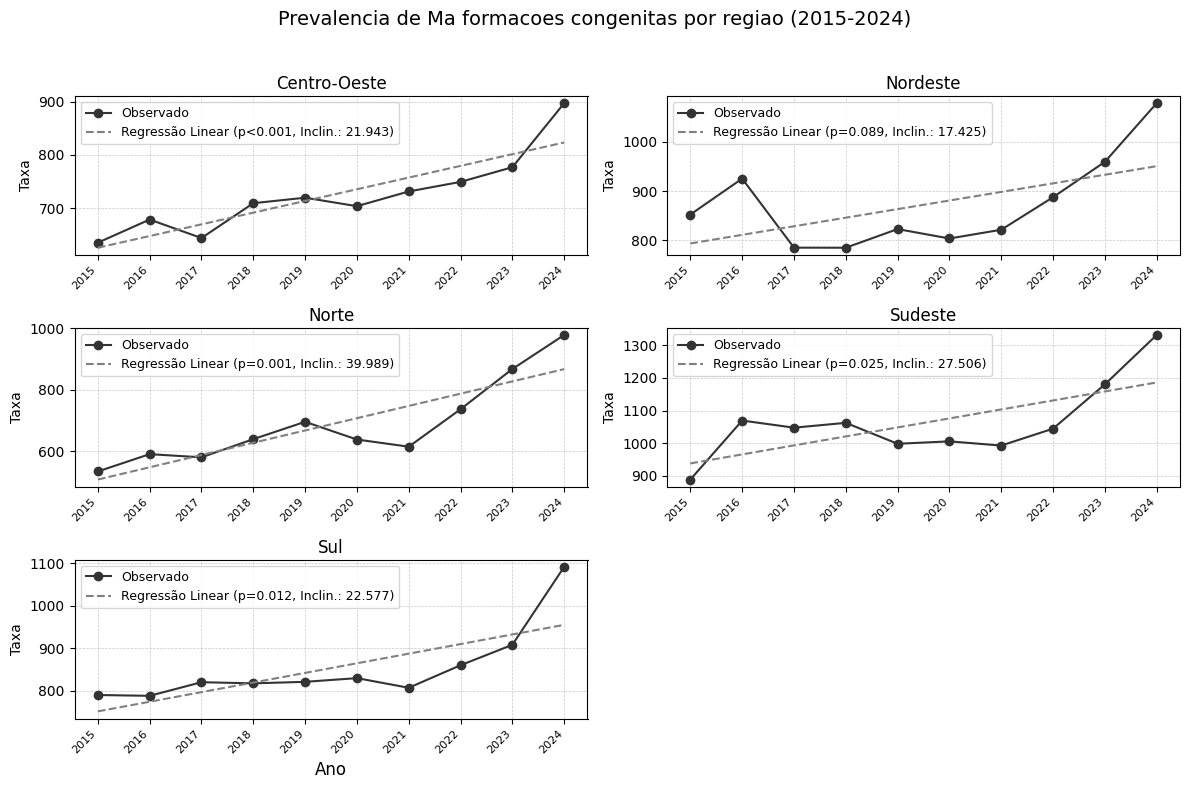

In [4]:
from api.viz.trends import plotar_grafico_tendencia, plotar_grade_tendencia
import matplotlib.pyplot as plt

graph_title = f"Prevalencia de Ma formacoes congenitas por regiao ({years[0]}-{years[-1]})"

plotar_grafico_tendencia(time_series_table, graph_title)
plt.show()

plotar_grade_tendencia(time_series_table, regression_results, graph_title)
plt.show()

### 4. Spatial Analysis by Municipality (2015, 2020, 2024)

---Starting spatial analysis for the year 2015... ---
Starting SINASC loading...
✅ Parquet 2015 already exists - using it directly
SINASC loading complete.
Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'name_state',
       'code_region', 'name_region', 'geometry', '_cod_join', 'ano',
       'CODMUNRES', 'n_nascidos_vivos', 'casos', 'taxa_por_100000'],
      dtype='object')
5570 municipalities with data found.


/home/luisgabriel/Documents/MED/pesquisa/2026/maformacoes-python/.venv/lib/python3.10/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1525, 3499.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 1525, ' is an island (no neighbors)')
('WARNING: ', 3499, ' is an island (no neighbors)')
Global Moran's I (2015): 0.1980 (p-value: 0.0010)


/home/luisgabriel/Documents/MED/pesquisa/2026/maformacoes-python/.venv/lib/python3.10/site-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


LISA cluster count (2015):
lisa_cluster
Não significante    4456
Baixo-Baixo          488
Alto-Alto            296
Baixo-Alto           172
Alto-Baixo           158
Name: count, dtype: int64


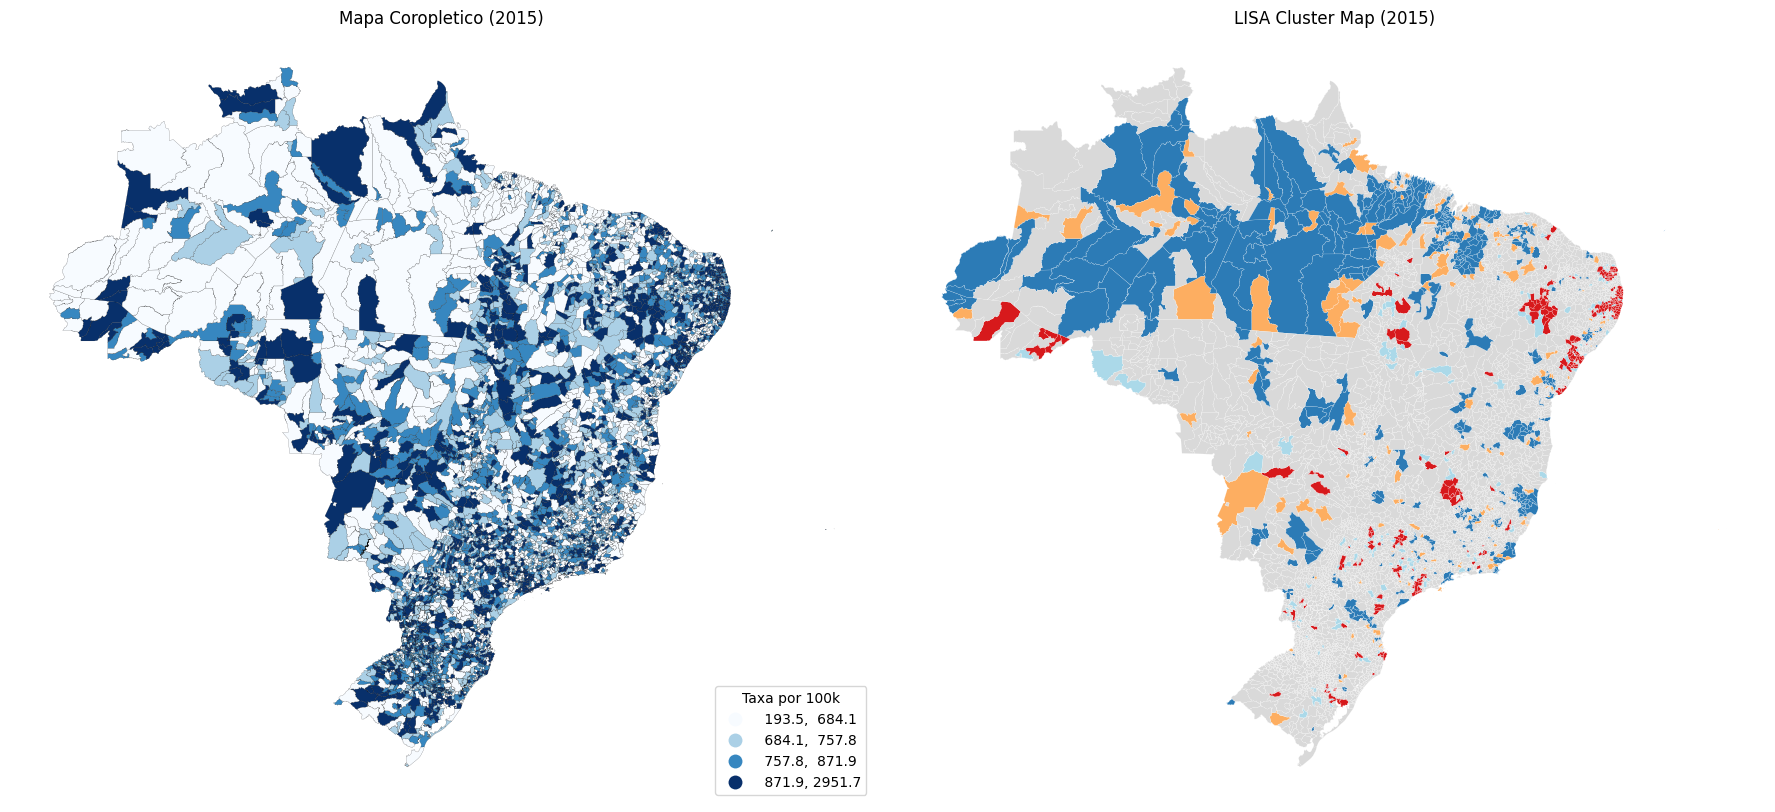

---Starting spatial analysis for the year 2020... ---
Starting SINASC loading...
✅ Parquet 2020 already exists - using it directly
SINASC loading complete.
Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'name_state',
       'code_region', 'name_region', 'geometry', '_cod_join', 'ano',
       'CODMUNRES', 'n_nascidos_vivos', 'casos', 'taxa_por_100000'],
      dtype='object')
5570 municipalities with data found.


/home/luisgabriel/Documents/MED/pesquisa/2026/maformacoes-python/.venv/lib/python3.10/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1525, 3499.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 1525, ' is an island (no neighbors)')
('WARNING: ', 3499, ' is an island (no neighbors)')
Global Moran's I (2020): 0.1919 (p-value: 0.0010)


/home/luisgabriel/Documents/MED/pesquisa/2026/maformacoes-python/.venv/lib/python3.10/site-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


LISA cluster count (2020):
lisa_cluster
Não significante    4448
Baixo-Baixo          535
Alto-Alto            265
Baixo-Alto           168
Alto-Baixo           154
Name: count, dtype: int64


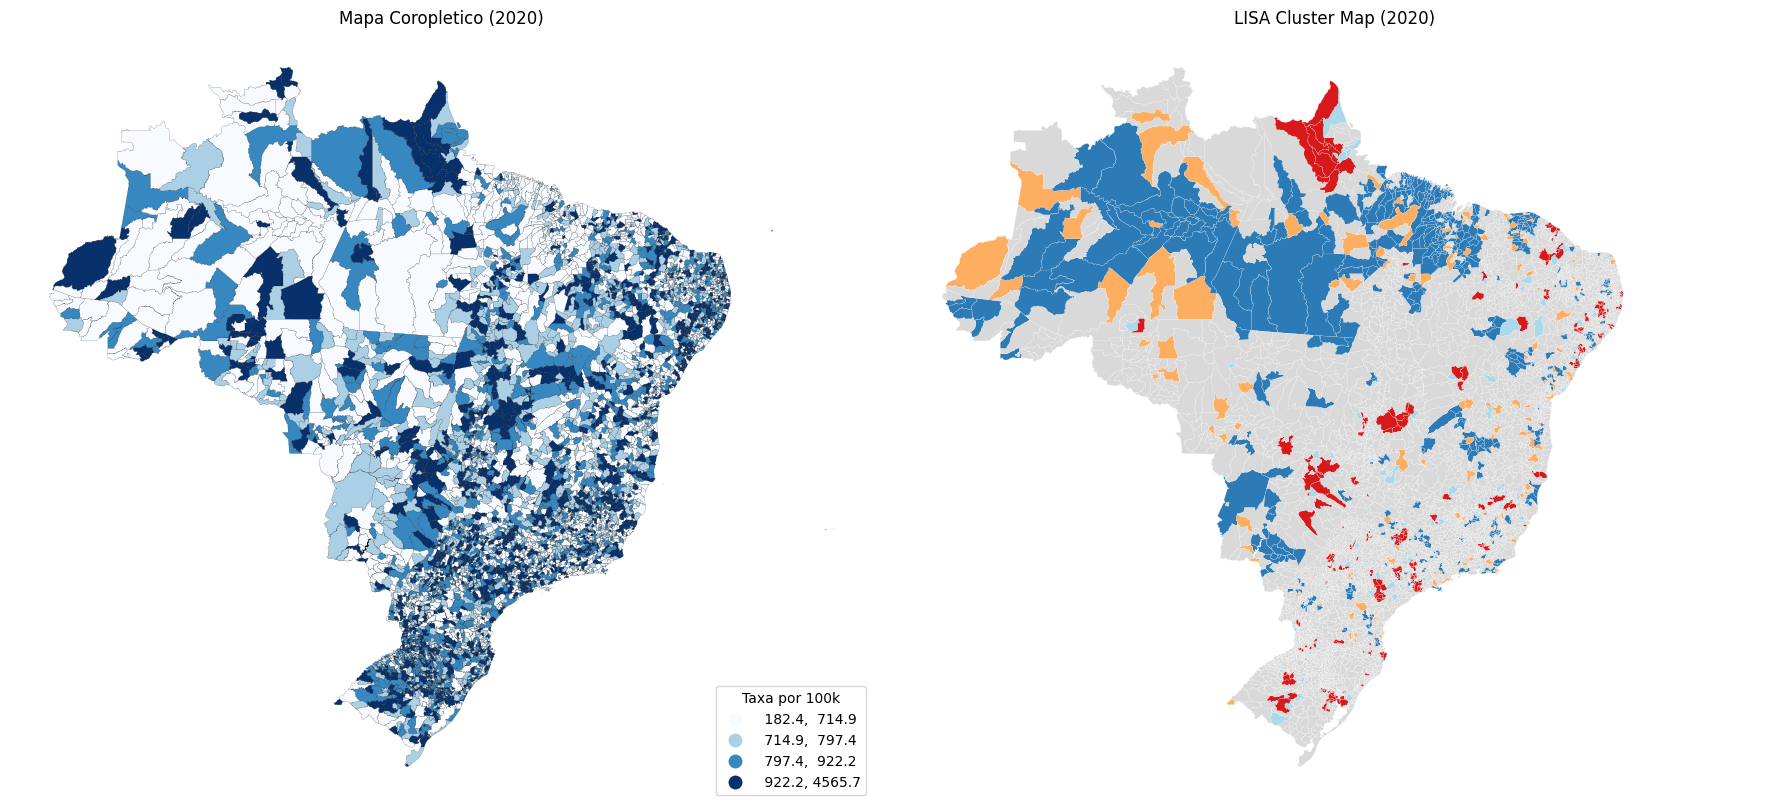

---Starting spatial analysis for the year 2024... ---
Starting SINASC loading...
✅ Parquet 2024 already exists - using it directly
SINASC loading complete.
Index(['code_muni', 'name_muni', 'code_state', 'abbrev_state', 'name_state',
       'code_region', 'name_region', 'geometry', '_cod_join', 'ano',
       'CODMUNRES', 'n_nascidos_vivos', 'casos', 'taxa_por_100000'],
      dtype='object')
5570 municipalities with data found.


/home/luisgabriel/Documents/MED/pesquisa/2026/maformacoes-python/.venv/lib/python3.10/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 1525, 3499.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 1525, ' is an island (no neighbors)')
('WARNING: ', 3499, ' is an island (no neighbors)')
Global Moran's I (2024): 0.1741 (p-value: 0.0010)


/home/luisgabriel/Documents/MED/pesquisa/2026/maformacoes-python/.venv/lib/python3.10/site-packages/esda/moran.py:1350: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


LISA cluster count (2024):
lisa_cluster
Não significante    4497
Baixo-Baixo          481
Alto-Alto            283
Alto-Baixo           160
Baixo-Alto           149
Name: count, dtype: int64


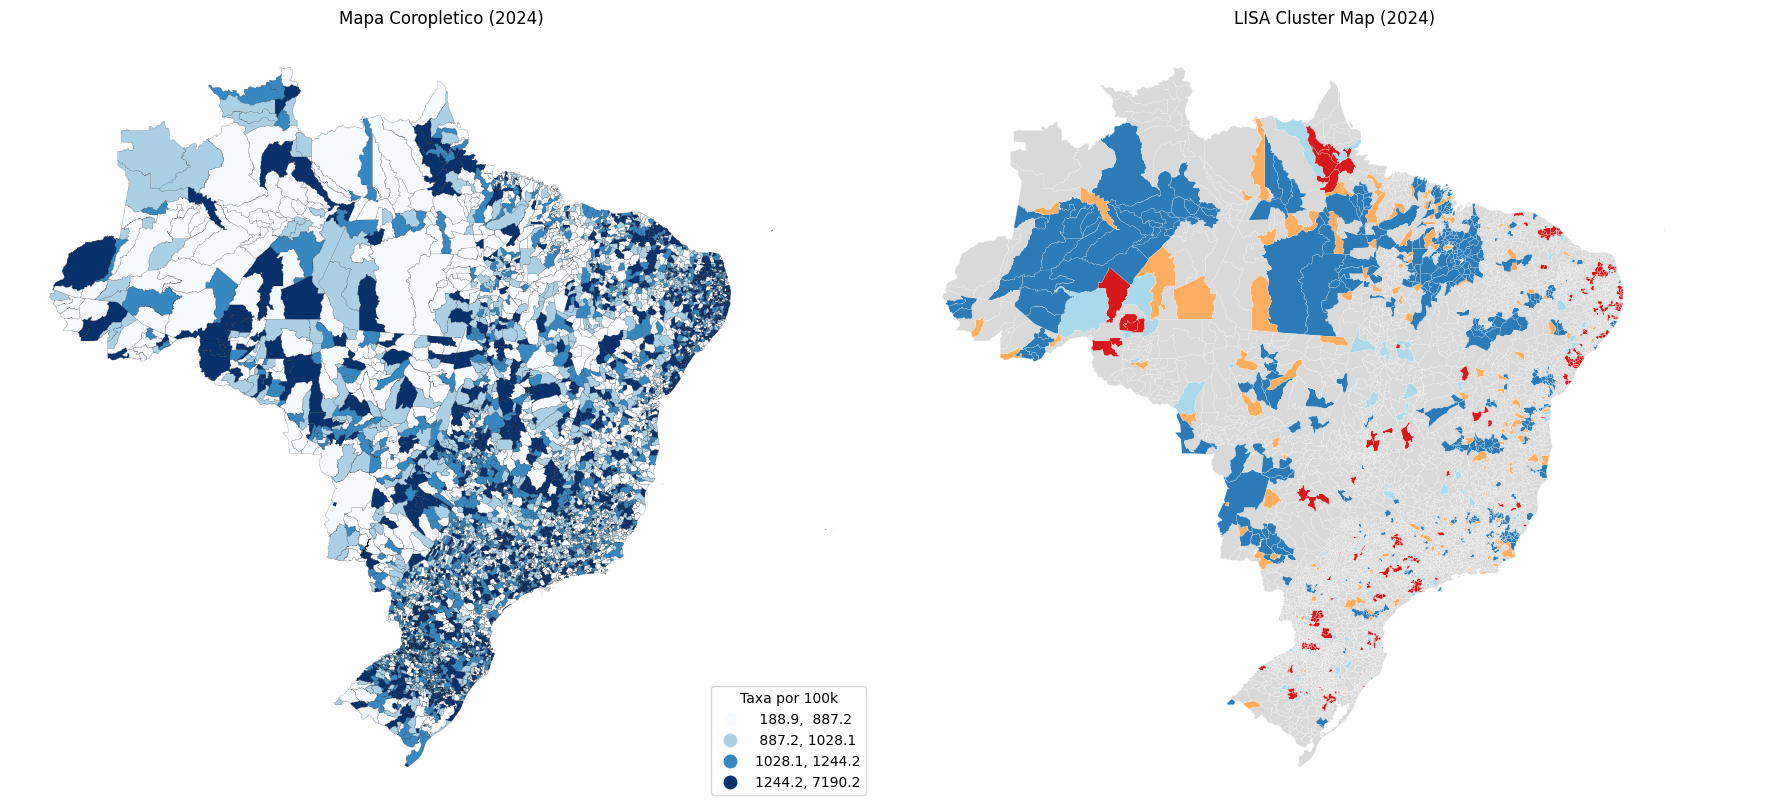

In [6]:
from api.analysis.spatial import criar_matriz_vizinhanca, calcular_moran_global, calcular_lisa_local, suavizar_taxa
from api.viz.maps import plotar_mapa_coropletico

spatial_years = [2015, 2020, 2024]

for year in spatial_years:
    print(f"---Starting spatial analysis for the year {year}... ---")

    gdf = obter_taxa_sinasc(
        anos=[year],
        cid=cid_prefix,
        estratos=["CODMUNRES"],
        retorno="geopandas"
    )

    analysis_gdf = gdf[gdf['n_nascidos_vivos'].notna()].copy()
    print(analysis_gdf.columns)

    analysis_gdf_suavizado = suavizar_taxa(
        analysis_gdf,
        coluna_casos="casos",
        coluna_populacao="n_nascidos_vivos",
        nome_saida="taxa_eb"
    )
    print(f"{len(analysis_gdf)} municipalities with data found.")

    if not analysis_gdf.empty:
        w = criar_matriz_vizinhanca(analysis_gdf, metodo="queen")

        moran_i, moran_p = calcular_moran_global(analysis_gdf_suavizado, coluna="taxa_eb", w=w)
        print(f"Global Moran's I ({year}): {moran_i:.4f} (p-value: {moran_p:.4f})")

        lisa_gdf = calcular_lisa_local(analysis_gdf_suavizado, coluna="taxa_eb", w=w)

        print(f"LISA cluster count ({year}):")
        print(lisa_gdf["lisa_cluster"].value_counts())

        fig, axes = plt.subplots(1, 2, figsize=(18, 8))

        plotar_mapa_coropletico(
            analysis_gdf_suavizado,
            coluna="taxa_eb",
            ax=axes[0],
            titulo_legenda="Taxa por 100k"
        )
        axes[0].set_title(f"Mapa Coropletico ({year})")
        axes[0].axis('off')

        cluster_colors = {
            'Não significante': '#d9d9d9',
            'Alto-Alto': '#d7191c',
            'Baixo-Baixo': '#2c7bb6',
            'Baixo-Alto': '#abd9e9',
            'Alto-Baixo': '#fdae61'
        }

        lisa_gdf['lisa_color'] = lisa_gdf['lisa_cluster'].map(cluster_colors)
        
        lisa_gdf.plot(
            color=lisa_gdf['lisa_color'],
            ax=axes[1],
            edgecolor='white',
            linewidth=0.1
        )
        axes[1].set_title(f"LISA Cluster Map ({year})")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No data to plot the maps.")


### 5. Spatial Analysis for a Specific State (Example: São Paulo)

---Starting spatial analysis for MG in 2024... ---
Starting SINASC loading...
✅ Parquet 2024 already exists - using it directly
SINASC loading complete.
853 municipalities with data found in MG.


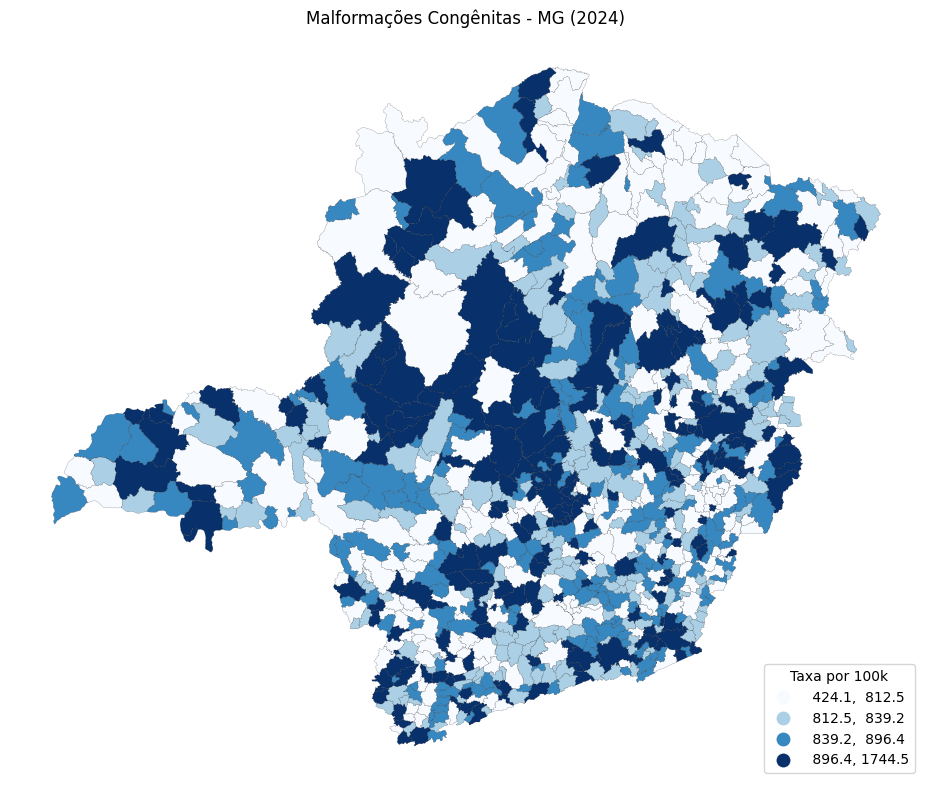

In [2]:
# 5. Spatial Analysis for a Specific State (e.g., SP) in 2024
from api.sinasc import obter_taxa_sinasc
from api.analysis.spatial import criar_matriz_vizinhanca, calcular_moran_global, calcular_lisa_local, suavizar_taxa
from api.viz.maps import plotar_mapa_coropletico
import matplotlib.pyplot as plt

year = 2024
uf_target = "MG"

print(f"---Starting spatial analysis for {uf_target} in {year}... ---")

gdf_sp = obter_taxa_sinasc(
    anos=[year],
    cid='Q',
    estratos=["CODMUNRES"],
    uf=uf_target,
    retorno="geopandas"
)

# Filter out rows with no birth data
analysis_gdf_sp = gdf_sp[gdf_sp['n_nascidos_vivos'].notna()].copy()
print(f"{len(analysis_gdf_sp)} municipalities with data found in {uf_target}.")

if not analysis_gdf_sp.empty:
    # Smoothing
    analysis_gdf_sp_suavizado = suavizar_taxa(
        analysis_gdf_sp,
        coluna_casos="casos",
        coluna_populacao="n_nascidos_vivos",
        nome_saida="taxa_eb"
    )
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plotar_mapa_coropletico(
        analysis_gdf_sp_suavizado,
        coluna="taxa_eb",
        ax=ax,
        titulo_legenda="Taxa por 100k"
    )
    ax.set_title(f"Malformações Congênitas - {uf_target} ({year})")
    ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for {uf_target}")